In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1 Train und Test Daten

In [2]:
df = pd.read_csv("C:/BBB/2. Jahr/259/LB/archive/1553768847-housing.csv")

In [3]:
X = df.drop("median_house_value", axis=1).select_dtypes(include=[np.number]).dropna()
y = df.loc[X.index, "median_house_value"]

In [4]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 2. Begründung für den gewählten Algorithmus

Ich verwende den Algorithmus LinearRegression aus `sklearn`, weil mein Zielwert `median_house_value` ein numerischer Wert ist. Lineare Regression ist ein einfacher und schneller Algorithmus, der gut für den Einstieg geeignet ist. Er hilft dabei, erste Zusammenhänge zwischen den Eingabewerten und dem Hauspreis zu erkennen und liefert ein solides Basismodell für Regressionsaufgaben.
(Letzte 2 Sätze aus ChatGPT)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 3 Testen

In [7]:
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print("Mean Squared Error:", mse)
print("R²-Score:", r2)

Mean Squared Error: 4921881237.628142
R²-Score: 0.640086568899374


Der MSE zeigt, wie groß der Fehler im Durchschnitt ist – je kleiner, desto besser.

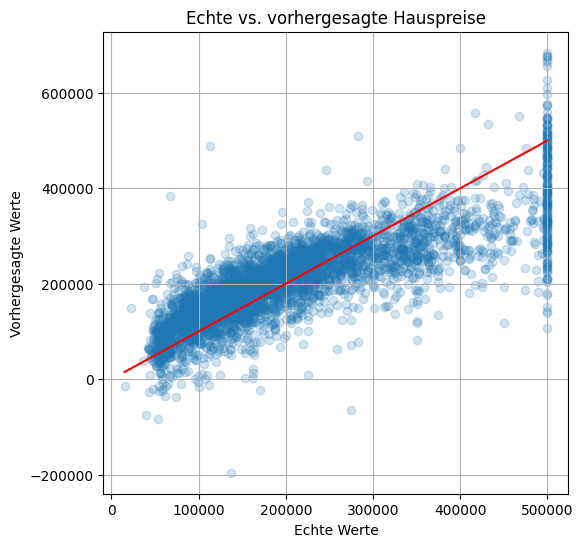

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Echte Werte")
plt.ylabel("Vorhergesagte Werte")
plt.title("Echte vs. vorhergesagte Hauspreise")
plt.grid(True)
plt.show()

Auch hier sieht man beim "Echten Wert" viele Punkte bei 500000, das liegt auch daran dass die maximal-Wert bei 500000 liegt.

## Wie gut ist mein Modell?
Ich finde, das Modell hat ganz gut funktioniert. Es konnte viele Hauspreise recht genau vorhersagen, vor allem bei mittleren Werten. Bei teuren Häusern war es schwieriger, was aber bei einem einfachen Modell normal ist. Insgesamt bin ich zufrieden mit dem Ergebnis, weil es zeigt, dass man mit wenigen Daten schon gute Einschätzungen machen kann.